In [1]:
## ! pip install tensorflow

## Step 1: Inserting Libaries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Step 2: Reading and Understanding the Data


In [3]:
# File Reading
Reading_df = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Shape of Data
Reading_df.shape

(99999, 226)

In [5]:
# First 5 columns
Reading_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Last 5 columns
Reading_df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [7]:
# Checking Dtypes and verbose 1 beacuse of too many features
Reading_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Numerical Deatils
Reading_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Step3 Data Cleaning

In [9]:
## Checking NUll values
Cleaning_df = Reading_df.copy() ## Just keeping orginial Data Secured

## 3.1) High Value Churn

> Given in problem Statement: In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

In [10]:
# Calculate the average recharge amount for months 6 and 7
Cleaning_df['avg_rech_amt_6_7'] = (Cleaning_df['total_rech_amt_6'] + Cleaning_df['total_rech_amt_7']) / 2

# Find the 70th percentile of the average recharge amount for months 6 and 7
quantile_seventieth_percentile = Cleaning_df['avg_rech_amt_6_7'].quantile(0.7)

# Filter the DataFrame to keep only rows where the average recharge amount for months 6 and 7 is greater than or equal to the 70th percentile
Cleaning_df = Cleaning_df[Cleaning_df['avg_rech_amt_6_7'] >= quantile_seventieth_percentile]
print("quantile_seventieth_percentile", quantile_seventieth_percentile)
print("Shape of High Value Churn:",Cleaning_df.shape)

quantile_seventieth_percentile 368.5
Shape of High Value Churn: (30011, 227)


In [11]:
## Rows and columns percentage after Filtering and deleting more than 50 percent of null values coulumns

## reading_df is the orginal dataset
retained = round((Cleaning_df.shape[0] / Reading_df.shape[0]) *100 ,2)
retained_df= round((Cleaning_df.shape[1] / Reading_df.shape[1]) *100 ,2)
print(f"Rows Retained Percentage: {retained}")
print(f"Columns Retained Percentage: {retained_df}")

Rows Retained Percentage: 30.01
Columns Retained Percentage: 100.44


### 3.2 Handling Missing Values

In [12]:
# Calculate the number of missing values and percentage of missing values
Cleaning_df_missing = Cleaning_df.isnull().sum()
Cleaning_df_percent_missing = Cleaning_df_missing * 100 / len(Cleaning_df.index)

# Create a DataFrame to store both missing values and percentages
summary = pd.DataFrame({'Missing Values': Cleaning_df_missing,'Percentage (%)': Cleaning_df_percent_missing})
# Sort the DataFrame
summary_sorted = summary[summary['Missing Values'] > 0]
summary_sorted = summary_sorted.sort_values(by='Percentage (%)', ascending=False)
summary_sorted

,Missing Values,Percentage (%)
count_rech_3g_6,18614,62.023925
total_rech_data_6,18614,62.023925
date_of_last_rech_data_6,18614,62.023925
arpu_2g_6,18614,62.023925
fb_user_6,18614,62.023925
max_rech_data_6,18614,62.023925
count_rech_2g_6,18614,62.023925
arpu_3g_6,18614,62.023925
night_pck_user_6,18614,62.023925
av_rech_amt_data_6,18614,62.023925


> Removing all feautures which have more than 50 percent of Null values

In [13]:
# Dropping columns with more than 50% missing values in one step
Cleaning_df = Cleaning_df.drop([col for col in Cleaning_df.columns if Cleaning_df[col].isnull().mean() > 0.5], axis=1)

# Printing the new shape of the DataFrame
print ("Orginal Data Shape:", Reading_df.shape)
print("After Drop Data Shape:", Cleaning_df.shape)

Orginal Data Shape: (99999, 226)
After Drop Data Shape: (30011, 187)


In [14]:
# Percentage of missing values in each column
missing_values_rows = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
summary = missing_values_rows[missing_values_rows > 0].to_frame(name='null').sort_values(by='null', ascending=False)
summary

,null
std_ic_t2m_mou_9,5.68
std_og_mou_9,5.68
roam_og_mou_9,5.68
std_og_t2t_mou_9,5.68
loc_og_t2t_mou_9,5.68
isd_og_mou_9,5.68
std_ic_t2o_mou_9,5.68
loc_og_t2m_mou_9,5.68
spl_ic_mou_9,5.68
roam_ic_mou_9,5.68


>It appears that the Minutes of Usage (MOU) for all call types in the month of September (9) are uniformly missing in certain records.

> We need to investigate the records where MOU values for September (9) are missing across all call types.

In [15]:
missing_values_rows_568 = summary[summary['null'] == 5.68].index.tolist()
print (missing_values_rows_568)

['std_ic_t2m_mou_9', 'std_og_mou_9', 'roam_og_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2t_mou_9', 'isd_og_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2m_mou_9', 'spl_ic_mou_9', 'roam_ic_mou_9', 'loc_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2m_mou_9', 'loc_og_mou_9', 'og_others_9', 'spl_og_mou_9', 'std_ic_mou_9', 'isd_ic_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'ic_others_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'onnet_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9']


In [16]:
# records of MOU values for September (9) which are null
mou_9 = Cleaning_df[Cleaning_df[missing_values_rows_568].isnull().all(axis=1)]
mou_9.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.

In [17]:
print(mou_9.shape)
print(Cleaning_df.shape)

(1704, 187)
(30011, 187)


In [18]:
round((1704/30011)*100, 3)

5.678

> Percent for record is less just 5.678%, Hence we can drop the null values

In [19]:
## Dropping mou_9
Cleaning_df = Cleaning_df.drop(mou_9.index)
print("Shape of Data after Dropping Columns:", Cleaning_df.shape)

Shape of Data after Dropping Columns: (28307, 187)


In [20]:
# Percentage of missing values in each column
missing_values_rows_2 = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
summary = missing_values_rows_2[missing_values_rows > 0].to_frame(name='null').sort_values(by='null', ascending=False)
summary

,null
date_of_last_rech_8,1.08
date_of_last_rech_9,1.04
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55
std_ic_t2f_mou_8,0.55
loc_og_t2f_mou_8,0.55
og_others_8,0.55
std_ic_t2m_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2t_mou_8,0.55


> Null Percent is less now and we can compute using K means 

In [21]:
missing_values = summary[summary['null'] >= 0].index.tolist()
print (missing_values)

['date_of_last_rech_8', 'date_of_last_rech_9', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'loc_og_mou_8', 'std_ic_t2t_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8', 'spl_og_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'isd_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'roam_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_6', 'og_others_6', 'isd_ic_mou_6', 'std_og_t2f_mou_6', 'offnet_mou_6', 'loc_ic_mou_6', 'std_og_t2c_mou_6', 'spl_og_mou_6', 'ic_others_6', 'std_og_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6', 'isd_og_mou_6', 'std_ic_mou_6', 'std_ic_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_og_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6', 'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 'spl_ic_mou_6', 'std

### 3.3) Fixed Null values using Knn Imputer

> Imputation for completing missing values using k-Nearest Neighbors

In [22]:
numeric_missing_values = Cleaning_df[missing_values].select_dtypes(include=['float64', 'int64'])
scalar = MinMaxScaler() # Initialize MinMaxScaler
scaled_numeric_data = scalar.fit_transform(numeric_missing_values) # Scale the numeric data

# Initialize KNNImputer
knn = KNNImputer(n_neighbors=3)
imputed_data = knn.fit_transform(scaled_numeric_data)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_missing_values.columns)

# Replace original numeric columns in Cleaning_df with the imputed data
Cleaning_df[numeric_missing_values.columns] = imputed_df
# First Five records
Cleaning_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,0.011711,0.014573,0.007481,0.003842,0.027786,0.029045,0.009758,0.004758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013433,0.016063,0.007481,0.003856,0.030169,0.038382,0.021744,0.010255,0.080032,0.010076,0.016026,0.0,0.0,0.0,0.000000,0.000000,0.026612,0.039670,0.018407,0.007702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055174,0.174228,0.025498,0.002907,0.0,0.0,0.0,0.0,0.004112,0.008676,0.000943,0.000230,0.000134,0.000055,0.000130,0.000302,0.000029,0.000672,0.000000,0.000000,0.000000,0.0,0.0,0.0,508.36,431.66,171.56,142.18,0.009374,0.028205,0.012462,0.002929,0.002595,0.020949,0.001872,0.000187,0.006971,0.000000,0.000000,0.000000,0.012843,0.039122,0.010548,0.002956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000107,0.0,0.001232,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000208,0.000000,0.000102,103.86,28.49,16.54,34.91,0.00000,0.0,0.0,0.011596,0.048998,0.046545,0.035592,0.028068,0.000417,0.00000,0.000289,0.000000,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0

In [23]:
## Checking Null values
imputed_df.isnull().sum().any()

False

In [24]:
## Need to scaled data back to the original data
Cleaning_df[numeric_missing_values.columns]=scalar.inverse_transform(imputed_df)

In [25]:
## Checking Null values
# Percentage of missing values in each column
missing_values_rows = round((Cleaning_df.isnull().sum() / len(Cleaning_df.index)) * 100, 2)

# missing values Columns which are greater than 0
summary = missing_values_rows[missing_values_rows > 0].to_frame(name='null').sort_values(by='null', ascending=False)
summary

,null
date_of_last_rech_8,1.08
date_of_last_rech_9,1.04
date_of_last_rech_7,0.20
date_of_last_rech_6,0.17


> Date columns are not required for analysis since we have total recharge value available in Dataset

In [26]:
Cleaning_df.select_dtypes(include=['datetime']).columns

Index([], dtype='object')

In [27]:
date_cols = [col for col in Cleaning_df.columns if 'date' in col]
Cleaning_df.drop(date_cols, axis=1, inplace=True)

In [28]:
print (Cleaning_df.isnull().sum().any())
print("Shape:", Cleaning_df.shape)

False
Shape: (28307, 179)


> Null Value are fixed Now

In [29]:
## Checking First Data
Cleaning_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,10

> Look like like Circle Id Has repeated values

In [30]:
Cleaning_df["circle_id"].value_counts()

circle_id
109    28307
Name: count, dtype: int64

> Circle id is highly skewed as it only contains one value so it is not required for analysis

In [31]:
Cleaning_df = Cleaning_df.drop('circle_id', axis=1)
# Shape after Dropped columns
print("Shape", Cleaning_df.shape)

Shape (28307, 178)


In [32]:
## Rows and columns percentage after Filtering and fixing Null Values

## reading_df is the orginal dataset
retained = round((Cleaning_df.shape[0] / Reading_df.shape[0]) *100 ,2)
retained_df= round((Cleaning_df.shape[1] / Reading_df.shape[1]) *100 ,2)


print(f"Rows Retained Percentage: {retained}")
print(f"Columns Retained Percentage: {retained_df}")

Rows Retained Percentage: 28.31
Columns Retained Percentage: 78.76


### 3.4)Checking collineartity of Variables

In [33]:
# Checking the correlation matrix for the each variable
matrix_corr = Cleaning_df.corr()
np.fill_diagonal(matrix_corr.values, np.nan)
stack = matrix_corr.stack()

# Filter highly correlated pairs (absolute correlation greater than 0.85
highly_correlated_pairs = stack[(np.abs(stack) > 0.85)].sort_values(ascending=False)
highly_correlated_pairs

isd_og_mou_7      isd_og_mou_8        0.957220
isd_og_mou_8      isd_og_mou_7        0.957220
arpu_8            total_rech_amt_8    0.952641
total_rech_amt_8  arpu_8              0.952641
isd_og_mou_6      isd_og_mou_7        0.950773
isd_og_mou_7      isd_og_mou_6        0.950773
isd_og_mou_8      isd_og_mou_6        0.949817
isd_og_mou_6      isd_og_mou_8        0.949817
total_rech_amt_9  arpu_9              0.944934
arpu_9            total_rech_amt_9    0.944934
arpu_6            total_rech_amt_6    0.940012
total_rech_amt_6  arpu_6              0.940012
arpu_7            total_rech_amt_7    0.936029
total_rech_amt_7  arpu_7              0.936029
                  avg_rech_amt_6_7    0.907303
avg_rech_amt_6_7  total_rech_amt_7    0.907303
                  arpu_7              0.903811
arpu_7            avg_rech_amt_6_7    0.903811
avg_rech_amt_6_7  total_rech_amt_6    0.897491
total_rech_amt_6  avg_rech_amt_6_7    0.897491
loc_ic_mou_9      total_ic_mou_9      0.896298
total_ic_mou_

In [34]:
# columns which are high collinearity are required to drop

Cleaning_df.drop(['total_rech_amt_8', 'isd_og_mou_8', 'isd_og_mou_7', 'sachet_2g_8', 'total_ic_mou_6',
                  'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 
                  'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], axis=1, inplace=True)

# Shape after Dropped columns
print("Dimensions after dropping columns:", Cleaning_df.shape)

Dimensions after dropping columns: (28307, 166)


## Given in problem statement
Tag churners and remove attributes of the churn phase Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

> total_ic_mou_9, 
> ,total_og_mou_9
>,vol_2g_mb_9
>,vol_3g_mb_9

After tagging churners, we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

## 3.5) Churn Tagging

In [35]:
# Custom function to determine churn
def check_churn(row):
    if (row['total_ic_mou_9'] == 0 and 
        row['total_og_mou_9'] == 0 and 
        row['vol_2g_mb_9'] == 0 and 
        row['vol_3g_mb_9'] == 0):
        return 1  # Churn
    else:
        return 0  # No churn

# Apply custom function to each row
Cleaning_df['churn'] = Cleaning_df.apply(check_churn, axis=1)

# Printing the first 10 rows of relevant columns
print(Cleaning_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']].head(5))

    total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
8            34.91          142.18          0.0          0.0      0
13          631.86          446.09          0.0          0.0      0
16          334.56          255.74          0.0          0.0      0
17           87.13          631.08          0.0          0.0      0
21          252.61         1031.53          0.0          0.0      0


In [36]:
# Calculate churn rate using groupby and agg
churn_stats = Cleaning_df.groupby('churn').agg({'churn': 'count'})

# Churn rate calculation as a percentage
total_customers = Cleaning_df['churn'].count()
churn_count = churn_stats.loc[1, 'churn'] if 1 in churn_stats.index else 0
churn_rate = round((churn_count / total_customers) * 100, 2)

# Output results
print("Churn Rate:", churn_rate, '%')
print(churn_stats)

Churn Rate: 3.52 %
       churn
churn       
0      27312
1        995


> Highly Imbalanced Data and need Remove all month 9 columns because it is used for churn tagging

In [37]:
# Identify columns with '_9' suffix using filter
cols_churn = Cleaning_df.filter(like='_9').columns.tolist()

# Drop the identified columns and 'sep_vbc_3g'
Cleaning_df.drop(columns=cols_churn + ['sep_vbc_3g'], inplace=True)

# Print the shape of the DataFrame after dropping the columns
print("Dimensions after dropping columns:", Cleaning_df.shape)

Dimensions after dropping columns: (28307, 124)


In [38]:
## Rows and columns percentage after Filtering and fix null values
## reading_df is the orginal dataset
retained = round((Cleaning_df.shape[0] / Reading_df.shape[0]) *100 ,2)
retained_df= round((Cleaning_df.shape[1] / Reading_df.shape[1]) *100 ,2)
print(f"Rows Retained Percentage: {retained}")
print(f"Columns Retained Percentage: {retained_df}")

Rows Retained Percentage: 28.31
Columns Retained Percentage: 54.87


## 3.6) Outliner Analysis

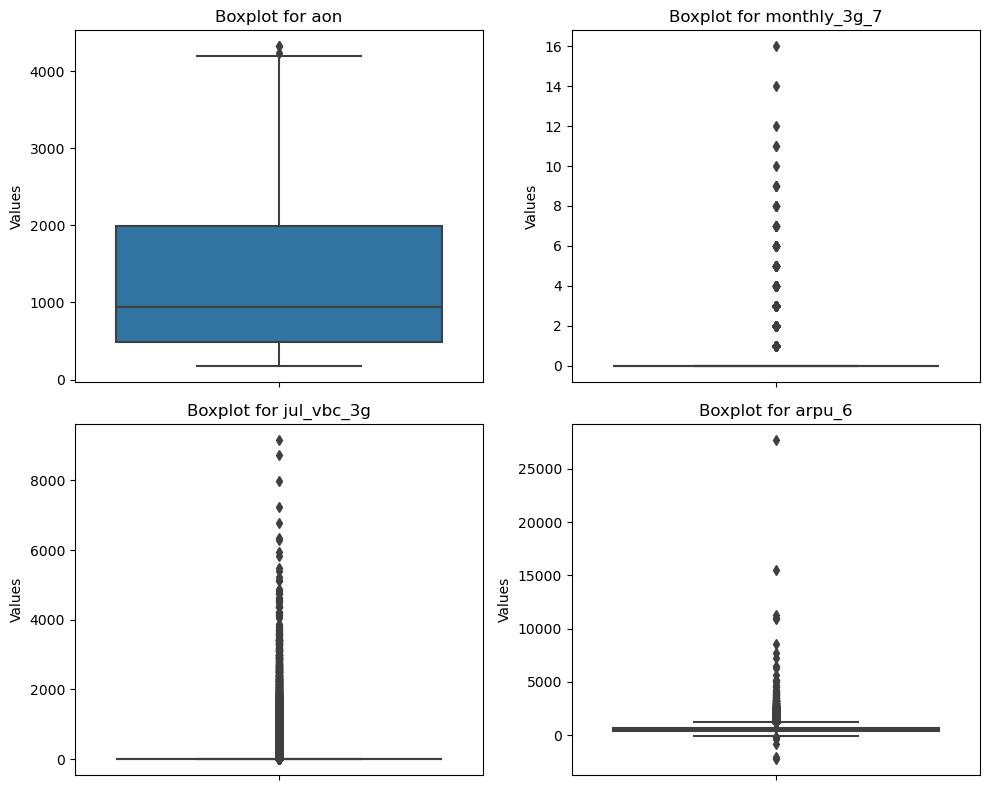

In [39]:
## Plotting Random Box Plot
data = ['aon', 'monthly_3g_7', 'jul_vbc_3g', 'arpu_6']
plt.figure(figsize=(10, 8))
for i, col in enumerate(data, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=col, data=Cleaning_df)
    plt.title(f'Boxplot for {col}')
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

>> Alot of outliner are detected

In [40]:
 ## Dont want to apply Quantile analysis
Cleaning_df['mobile_number'] = Cleaning_df['mobile_number'].astype(object)
Cleaning_df['churn'] = Cleaning_df['churn'].astype(object)
quantiles_df = Cleaning_df.quantile([0.05, 0.95])

# Checking for each numerical column
for cols in Cleaning_df.select_dtypes(include=['int', 'float']).columns:
    quantile_df = quantiles_df[cols]

    # Apply clipping to fix outliers
    Cleaning_df[cols] = Cleaning_df[cols].clip(quantile_df.iloc[0], quantile_df.iloc[1])

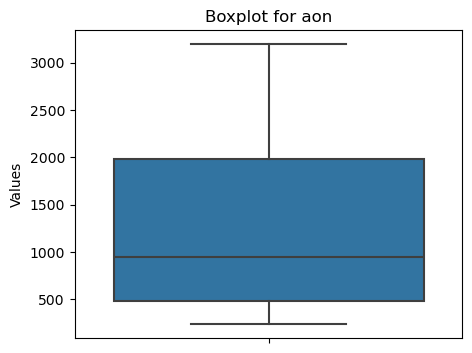

In [41]:
# Plotting a boxplot for 'aon' column
plt.figure(figsize=(5, 4))
sns.boxplot(y='aon', data=Cleaning_df)
plt.title('Boxplot for aon')
plt.ylabel('Values')
# Show the plot
plt.show()

> To some extend Outliner are fixed 

## Step-4) Data Visualisation

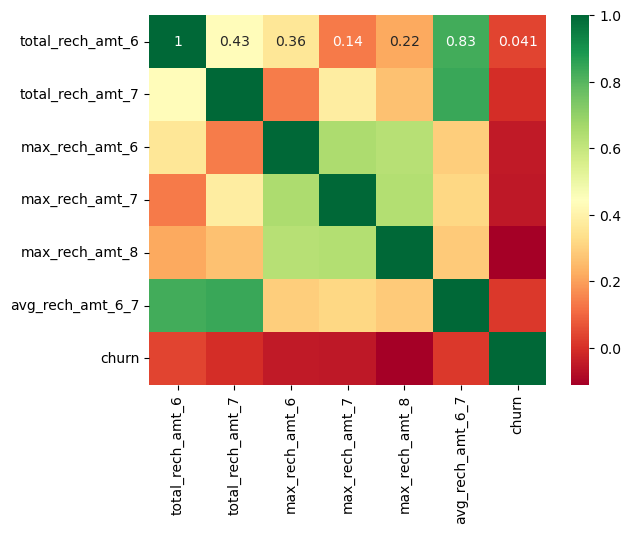

In [42]:
# Filter the columns containing 'rech_amt'
filtered_columns = [col for col in Cleaning_df.columns if 'rech_amt' in col]

Cleaning_df['churn'] = Cleaning_df['churn'].astype(int) ## Converted churn as integer to get correlations
num_category = filtered_columns + ['churn']

sns.heatmap(Cleaning_df[num_category].corr(), cmap="RdYlGn", annot=True)
plt.show()

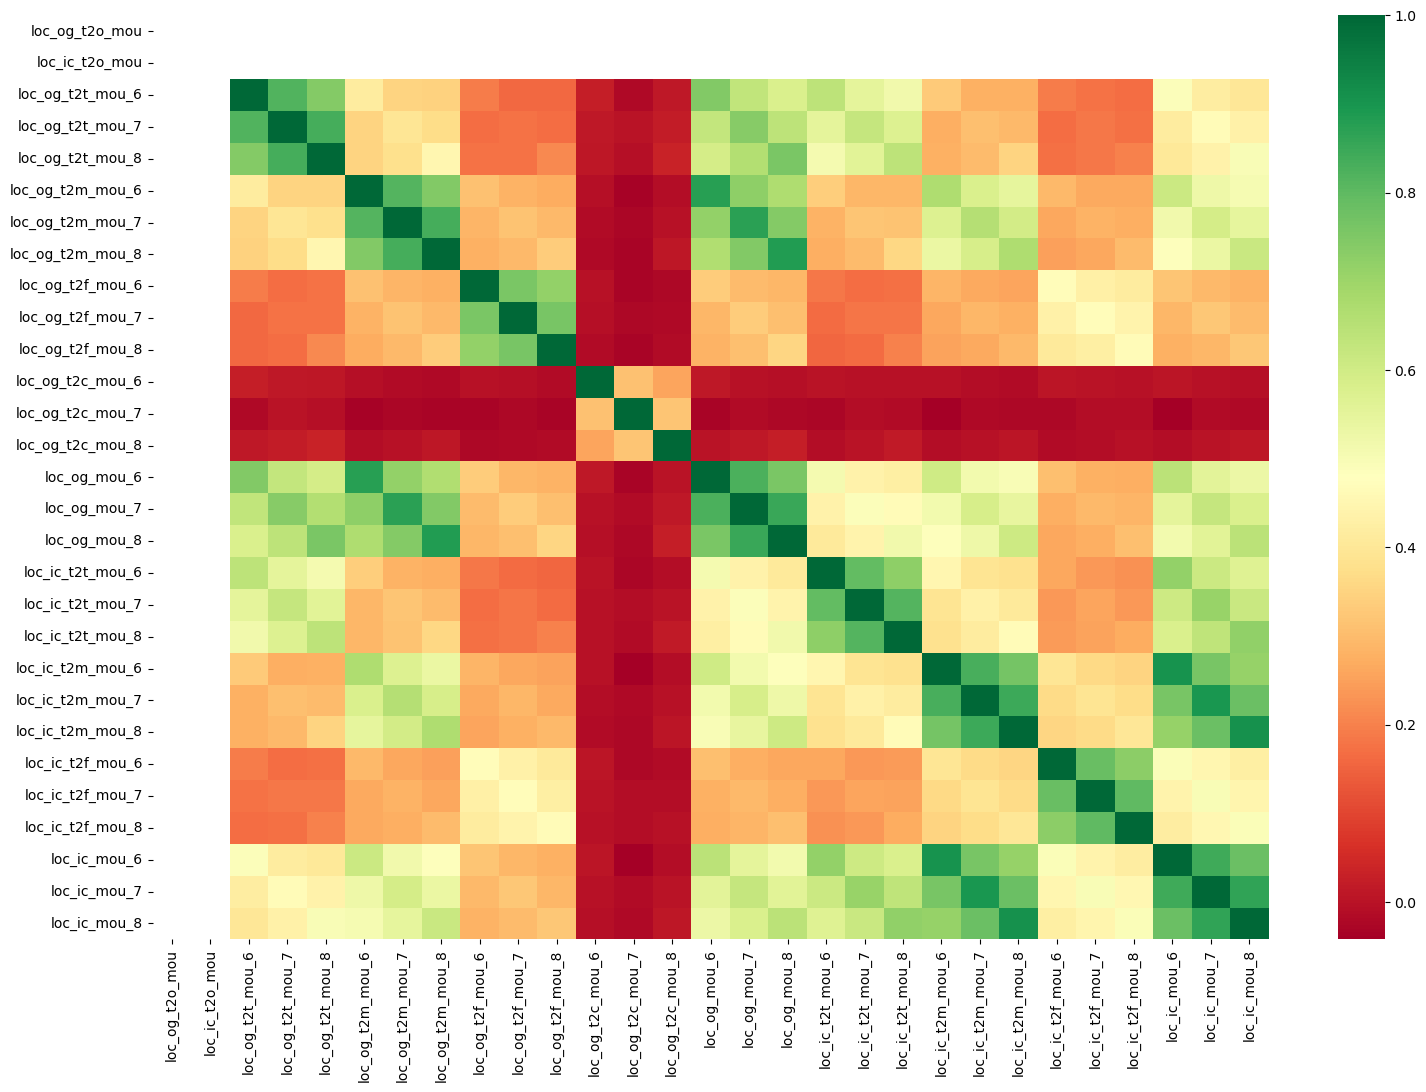

In [43]:
# Filter the columns containing 'rech_amt'
filtered_columns = [col for col in Cleaning_df.columns if 'loc' in col]

plt.figure(figsize=(18,12))
sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

>  loc_og_t2o_mou and loc_ic_t2o_mou can be droped because of no coorelation

In [44]:
Cleaning_df.drop(['loc_og_t2o_mou','loc_ic_t2o_mou'] ,axis=1,inplace=True)

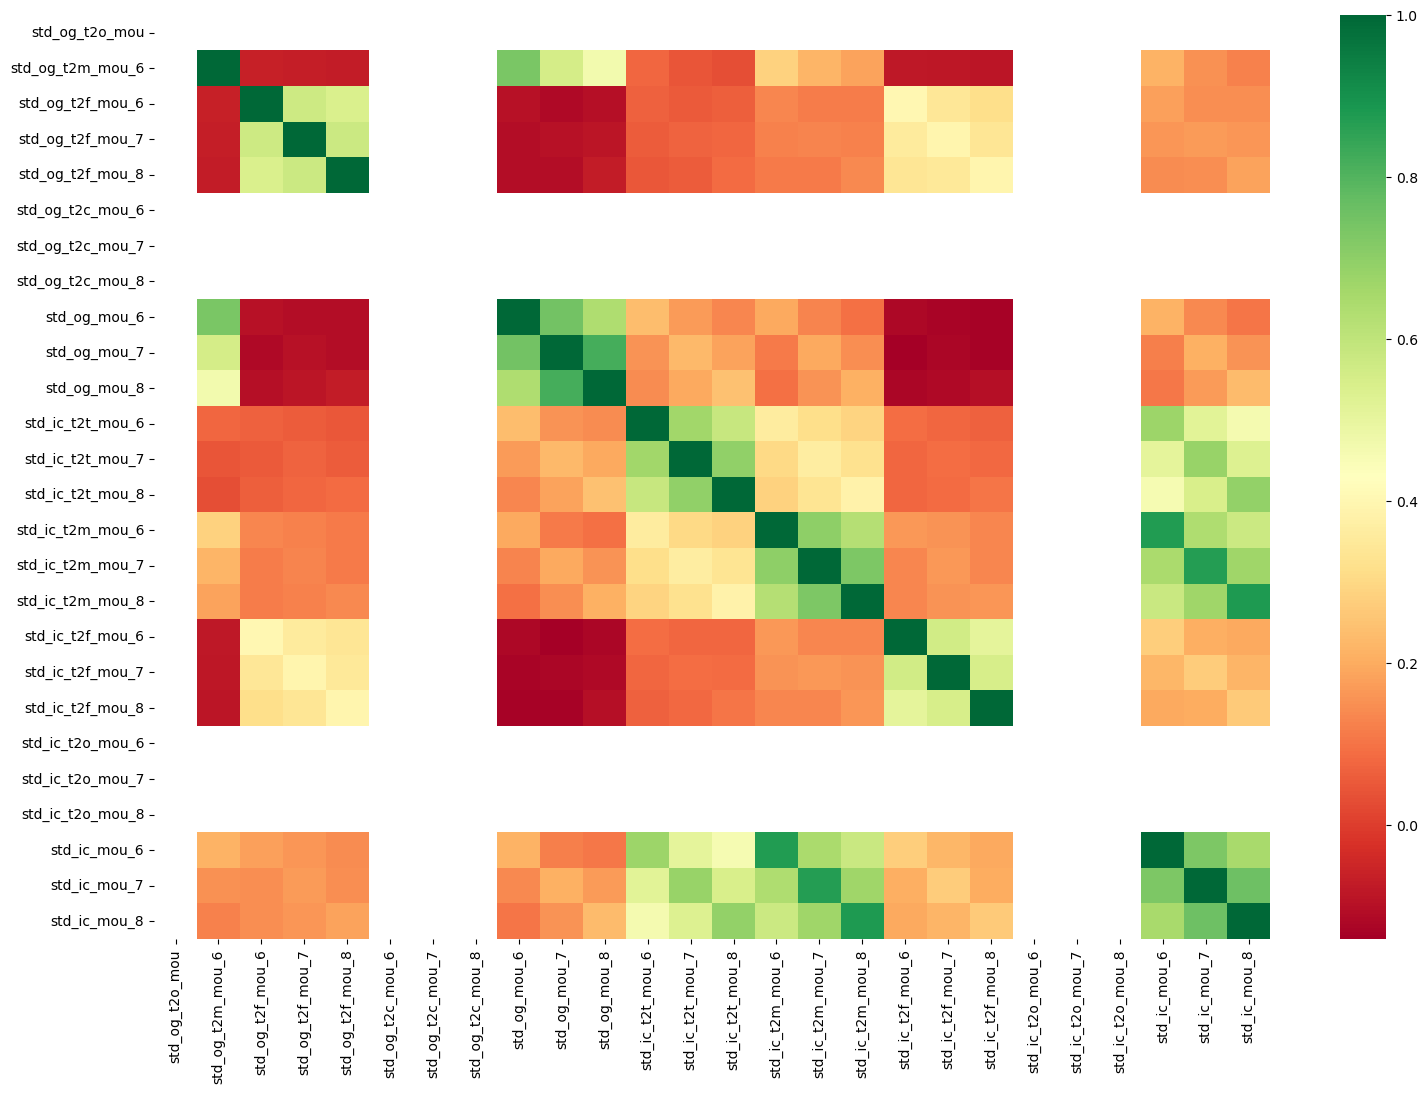

In [45]:
## STD calls with churn
# Filter the columns containing 'rech_amt'
filtered_columns = [col for col in Cleaning_df.columns if 'std' in col]

plt.figure(figsize=(18,12))
sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

In [46]:
## These columns doesnot have anhy correlation
col = ['std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
Cleaning_df.drop(col ,axis=1,inplace=True)

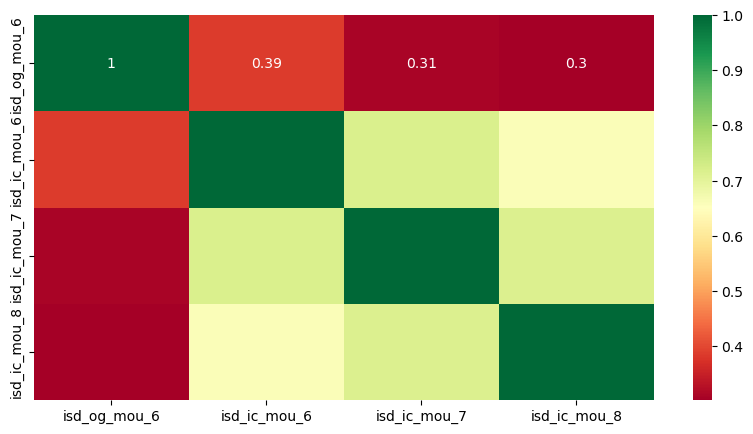

In [47]:
## isd calls with churn'
filtered_columns = [col for col in Cleaning_df.columns if 'isd' in col]

plt.figure(figsize=(10,5))
sns.heatmap(Cleaning_df[filtered_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

['arpu_6', 'arpu_7', 'arpu_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']


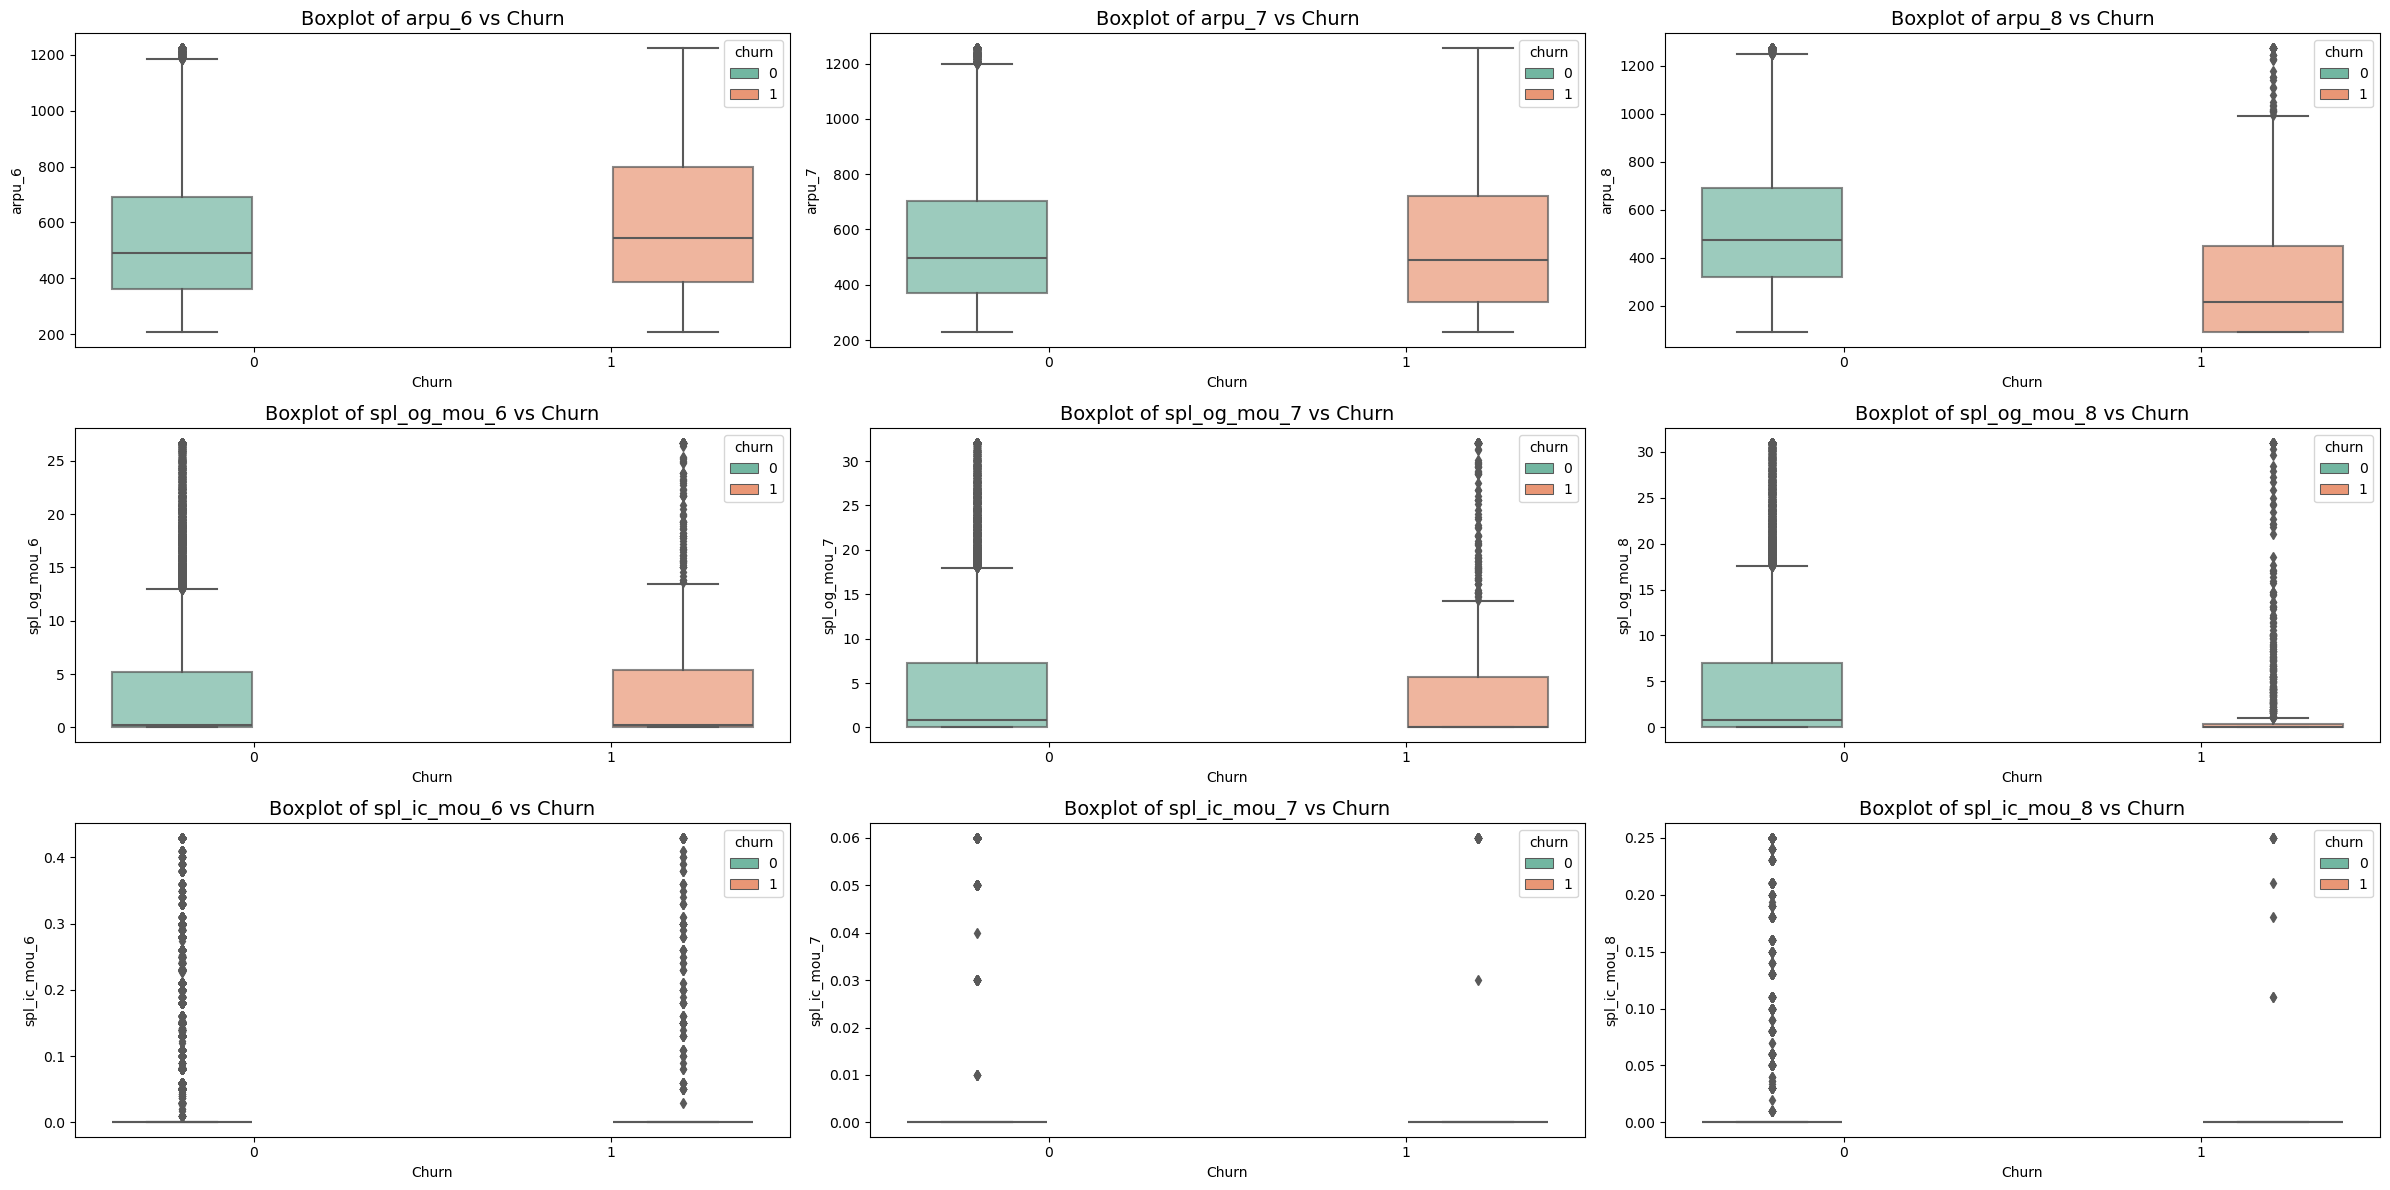

In [48]:
# Filter columns that contain 'spl' or 'arpu'
filtered_columns = [col for col in Cleaning_df.columns if 'spl' in col or 'arpu' in col]

# Print the filtered column names
print(filtered_columns)

# Set the figure size for better clarity
plt.figure(figsize=(24, 12))

# Generate boxplots for each filtered column with respect to churn
for index, column in enumerate(filtered_columns):
    plt.subplot((len(filtered_columns) + 2) // 3, 3, index + 1)  # Arrange subplots dynamically
    sns.boxplot(data=Cleaning_df, y=column, x="churn", hue="churn", palette="Set2", boxprops=dict(alpha=.7))
    plt.title(f"Boxplot of {column} vs Churn", fontsize=14)
    plt.ylabel(column)
    plt.xlabel('Churn')

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()

> Churned Customers: Across both ARPU and special calls, churned customers tend to have lower usage and revenue. This aligns with typical behavior where disengaged users reduce their telecom activity before eventually leaving.

> Non-Churned Customers: Those who remain with the service tend to have higher engagement, reflected by higher ARPU and special call usage. The greater variation in their boxplots suggests that these customers have diverse usage patterns, which may reflect different service needs.

In [49]:
# Assuming Cleaning_df is your updated DataFrame after EDA

# Defining the file path to save the CSV
file_path = 'updated_cleaning_df.csv'

# Save the DataFrame to a CSV file
Cleaning_df.to_csv(file_path, index=False)  # index=False to exclude row indices

print(f'DataFrame saved to {file_path}')

DataFrame saved to updated_cleaning_df.csv


## Step-5) Spilting into Train-Test Spilt

In [50]:
Data_Preprocessing = Cleaning_df.copy()

In [51]:
from sklearn.preprocessing import StandardScaler ## Importing Libaries
### Function to automatically detect and scale numerical columns
Data_Preprocessing['churn'] = Data_Preprocessing['churn'].astype(object)
def Feature_Scaling(Data_Preprocessing):
    # Detecting numerical columns
    cols = Data_Preprocessing.select_dtypes(include=['int', 'float']).columns

    # Initializing StandardScaler
    scaler = StandardScaler()

    # Scaling numerical columns
    Data_Preprocessing[cols] = scaler.fit_transform(Data_Preprocessing[cols])
    return Data_Preprocessing

# Applying scaling to numerical columns
Data_Preprocessing = Feature_Scaling(Data_Preprocessing)
Data_Preprocessing.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,-0.672559,-0.284273,-1.274156,0.471812,0.225269,-0.666740,-0.882649,-0.926125,-0.676003,-0.379617,-0.353916,-0.360609,-0.390432,-0.364812,-0.364092,2.403291,1.534521,-0.624672,-0.495887,-0.577551,-0.644096,-0.551310,-0.556862,-0.553809,-0.413968,-0.424367,2.368758,0.454168,0.092718,-0.727439,-0.589365,-0.346958,-0.347569,-0.340338,-0.488797,-0.484456,-0.504703,-0.276545,-0.581109,-0.619101,0.577197,-0.444175,0.0,0.0,-0.271038,-0.471883,-0.839938,-0.483471,-0.715832,-0.838465,-0.612531,-0.946784,-0.897914,-0.588045,-0.591706,-0.595620,-0.674907,-0.971135,-0.968360,-0.560364,-0.535894,-0.540130,-0.002721,-0.555707,-0.630518,-0.396023,-0.402767,-0.401798,-0.289901,-0.638271,-0.682283,-0.469678,-0.24022,-0.289781,-0.366085,-0.377548,-0.371623,-0.390792,-0.386298,-0.387362,1.077567,1.296849,0.536979,-0.704894,-0.218765,-0.649584,-0.070812,-1.201868,-0.540102,-1.169233,-0.943206,-0.41348,2.466469,-0.406051,-0.443549,1.229953,-0.431043,-0.358515,2.721156,-0.347376,-0.409639,0.537360,-0.362082,-0.369284,-0.366003,-0.26512,-0.264586,-0.252612,-1.017147,-0.347801,3.224307,0.177433,-0.520586,0
13,7002191713,-0.248963,-1.252549,0.209373,0.748875,-0.495013,0.924099,0.084334,-0.812497,0.384079,0.594596,3.654705,3.646339,-0.203850,0.802601,-0.316369,-0.242240,-0.714603,-0.363102,-0.088243,-0.713916,0.805513,-0.063817,-0.556862,2.136868,-0.413968,-0.424367,-0.231898,-0.210268,-0.818826,0.421652,0.337164,-0.346958,-0.347569,-0.340338,0.763162,-0.493850,0.719606,-0.276545,-0.581109,-0.619101,-0.056383,-0.444175,0.0,0.0,0.524663,-0.933011,0.783768,0.184562,-0.750342,-0.027834,-0.015325,-0.914613,0.350081,-0.345361,-0.591706,-0.197581,-0.044552,-0.960425,0.151084,3.192498,1.556737,3.212589,3.059803,0.172300,3.075913,-0.396023,-0.402767,0.251849,3.047657,0.513859,3.067595,2.962613,-0.24022,-0.289781,3.616210,3.578124,3.578924,3.615109,3.597411,3.611745,-0.779131,-1.009834,0.128329,-0.486832,-1.261274,-0.456876,-0.491116,-0.245318,0.272238,-0.541119,-1.067861,-0.41348,-0.414170,-0.406142,-0.443549,-0.458448,-0.458303,-0.358515,-0.367491,-0.347376,-0.409639,-0.406956,-0.362082,-0.369284,-0.366003,-0.26512,-0.264586,-0.252612,1.408506,-0.439094,-0.433346,-0.419665,-1.006633,0
16,7000875565,-0.478609,-0.987643,-1.109720,-0.670734,-0.597070,-0.553505,-0.270777,-0.487753,-0.595482,-0.379617,-0.175833,-0.360609,-0.390432,0.222536,-0.364092,

### Spilting into Train-Test Spilt

In [52]:
X = Data_Preprocessing.drop(['mobile_number','churn'], axis=1)
y = Data_Preprocessing['churn']

y = y.astype(int)

print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (28307, 113)
Y shape: (28307,)


In [53]:
## Spliting into 70:30 Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (19814, 113)
Y_train shape: (19814,)
X_test shape: (8493, 113)
Y_test shape: (8493,)


### Smote is used for balancing imbalance datasets

In [54]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)
print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")

X_train shape: (38252, 113)
Y_train shape: (38252,)


## pca

In [55]:
PCA = PCA(random_state=42)

In [56]:
# Fitting Data
PCA.fit(x_train)
PCA.components_

array([[ 6.02647222e-02,  1.09231728e-01,  1.68767558e-01, ...,
         7.24168974e-02,  6.91433104e-02,  9.62310474e-02],
       [ 1.66385476e-01,  1.75310567e-01,  9.51178924e-02, ...,
        -6.40228430e-02, -6.51820722e-02,  1.92720393e-01],
       [ 1.48274300e-01,  1.39942319e-01,  1.11193534e-01, ...,
         2.88427955e-02,  3.22110578e-02,  1.79547667e-01],
       ...,
       [-5.63380665e-03,  1.32597525e-02, -1.47845507e-02, ...,
         1.37423582e-03, -2.58244348e-04, -1.76239880e-02],
       [-0.00000000e+00,  7.21050203e-17,  7.22761686e-17, ...,
         1.60838939e-16,  5.42431453e-17,  2.79839404e-16],
       [-0.00000000e+00, -8.21660425e-17,  1.49250908e-16, ...,
        -3.50096741e-17,  8.82735112e-17, -8.47406494e-18]])

#### To determine the optimal number of principal components required to capture most of the variance in the data, enabling dimensionality reduction without significant information loss.

In [57]:
# Cumulative variance of the principal components
cumulative_variance = np.cumsum(PCA.explained_variance_ratio_)

# Print the cumulative variance
print("Cumulative Variance of Principal Components:")
print(cumulative_variance)

Cumulative Variance of Principal Components:
[0.14483079 0.24562907 0.32471161 0.37617695 0.42159938 0.46449271
 0.50238929 0.53680979 0.55866435 0.58012869 0.59968398 0.61880946
 0.63663066 0.65223872 0.66748923 0.68176111 0.69452439 0.70670123
 0.71791787 0.72905446 0.7397766  0.74967802 0.75933568 0.76843692
 0.77662246 0.78443661 0.79202937 0.79941229 0.8067019  0.81356772
 0.82006444 0.82642344 0.8324016  0.83815879 0.84384183 0.84946307
 0.8549854  0.86020678 0.86537738 0.87033198 0.87524898 0.88000406
 0.8847235  0.88919103 0.89353467 0.89779186 0.90190507 0.90590567
 0.9097018  0.91331028 0.9168247  0.92020643 0.92344427 0.92660606
 0.9296741  0.93261111 0.93540157 0.93808851 0.94071353 0.94330247
 0.94588392 0.94834806 0.95076007 0.95315276 0.95552873 0.9578017
 0.95997637 0.96200258 0.96401    0.9659742  0.96784256 0.969696
 0.97150933 0.97328398 0.97499738 0.9766836  0.97827557 0.97984682
 0.98127196 0.98268027 0.98402333 0.98527546 0.98648972 0.98767332
 0.98877688 0.989806

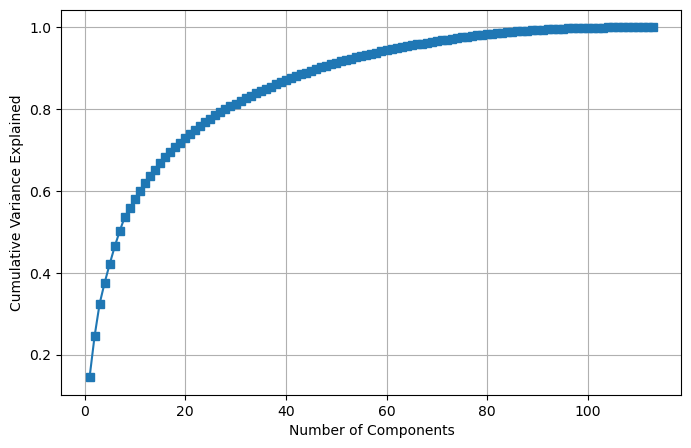

In [58]:
## Plotting Cumulative Variance of Principal Components
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

> Around 60 components is good as it covering more than 95 percent of data

In [59]:
## Building
IncrementalPCA = IncrementalPCA(n_components=60)
## Transforming
PCA_x_train = IncrementalPCA.fit_transform(x_train)
PCA_x_test = IncrementalPCA.transform(x_test)

In [60]:
PCA_x_train

array([[ 7.51197119,  1.46783418,  1.40703548, ...,  1.2058088 ,
        -0.13612586,  0.90762531],
       [ 0.728378  , -4.54267651,  1.6809022 , ...,  0.42481729,
        -0.51678421,  0.84588388],
       [ 2.39172091,  2.03908063,  0.93789943, ...,  0.02084097,
         2.38210484,  0.41295567],
       ...,
       [-3.48449796, -0.50698731, -2.47446703, ...,  0.0112187 ,
         0.12276471,  0.03665785],
       [-3.64638378, -0.82002552, -2.74400432, ...,  0.07471667,
         0.15974079, -0.11899829],
       [-2.86371697,  0.57781373, -2.31027989, ..., -0.02912162,
         0.15540556,  0.18745501]])

## Step-6) Model Building

## 1) Logistic regression with PCA

In [61]:
# Create KFold object
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid for grid search
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Grid search with Logistic Regression, prioritizing recall
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='recall', cv=cv_folds, return_train_score=True)

# Fit the model
grid_search.fit(PCA_x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall')

In [62]:
# Results
tuning_results = pd.DataFrame(grid_search.cv_results_)
tuning_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.169812,0.011574,0.008078,0.003743,0.01,{'C': 0.01},0.916710,0.915326,0.917883,0.912004,0.908495,0.914084,0.003419,6,0.912841,0.916270,0.914716,0.916639,0.915099,0.915113,0.001341
1,0.247540,0.099644,0.007353,0.004193,0.1,{'C': 0.1},0.918257,0.917700,0.919969,0.912530,0.909544,0.915600,0.003916,5,0.914284,0.916400,0.916024,0.917553,0.916601,0.916173,0.001071
2,0.197384,0.006922,0.010540,0.004033,1,{'C': 1},0.918515,0.917964,0.919969,0.912530,0.909806,0.915757,0.003900,4,0.914415,0.916140,0.916089,0.918141,0.916863,0.916329,0.001210
3,0.215297,0.019604,0.008693,0.001714,10,{'C': 10},0.918515,0.918227,0.919969,0.912530,0.909806,0.915809,0.003931,1,0.914415,0.916205,0.916089,0.918141,0.916928,0.916355,0.001214
4,0.198997,0.016149,0.008343,0.003809,100,{'C': 100},0.918515,0.918227,0.919969,0.912530,0.909806,0.915809,0.003931,1,0.914415,0.916205,0.916089,0.918141,0.916928,0.916355,0.001214


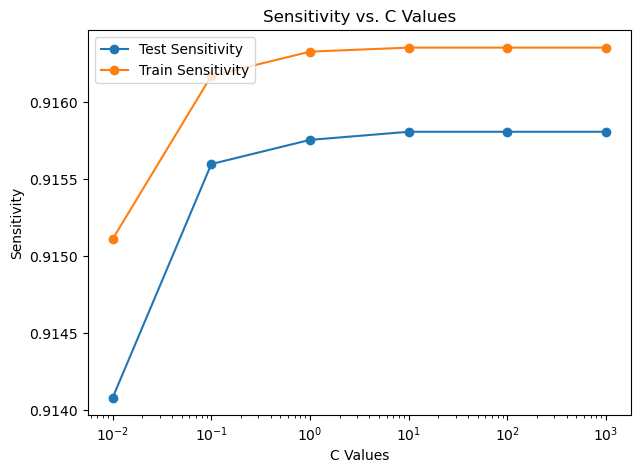

In [63]:
# Plot tuning results for test and train sensitivity
plt.figure(figsize=(7, 5))
plt.plot(tuning_results['param_C'], tuning_results['mean_test_score'], marker='o', label='Test Sensitivity')
plt.plot(tuning_results['param_C'], tuning_results['mean_train_score'], marker='o', label='Train Sensitivity')
plt.xscale('log')
plt.xlabel('C Values')
plt.ylabel('Sensitivity')
plt.title('Sensitivity vs. C Values')
plt.legend(loc='upper left')
plt.show()

In [64]:
best_score = grid_search.best_score_
bestpoint = grid_search.best_params_['C']
print(f"Highest test sensitivity: {best_score} at C = {bestpoint}")

Highest test sensitivity: 0.9158092650307441 at C = 10


## LogRegrission Model

In [65]:
log = LogisticRegression(C=bestpoint ).fit(PCA_x_train, y_train)

# test set Predictions
log_pred = log.predict(PCA_x_test)

In [66]:
report = classification_report(y_test,log_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      8186
           1       0.20      0.84      0.33       307

    accuracy                           0.87      8493
   macro avg       0.60      0.86      0.63      8493
weighted avg       0.96      0.87      0.91      8493



## 2) Decision Tree

In [67]:
# Define hyperparameters for tuning
params = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_split": [5, 10, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100]
}

decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")
grid_search.fit(PCA_x_train, y_train)

# Store tuning results in a DataFrame
tuning_results_dt = pd.DataFrame(grid_search.cv_results_)

# Display the first few rows of the results
tuning_results_dt.head()

Fitting 4 folds for each of 100 candidates, totalling 400 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.205252,0.046580,0.016678,0.014976,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.808324,0.823695,0.81533,0.817003,0.816088,0.005467,81
1,1.442648,0.019354,0.006868,0.000492,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.808324,0.823695,0.81533,0.817003,0.816088,0.005467,81
2,1.256324,0.023306,0.006113,0.001795,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.808324,0.823695,0.81533,0.817003,0.816088,0.005467,81
3,1.180875,0.030157,0.006851,0.000947,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.808324,0.823695,0.81533,0.817003,0.816088,0.005467,81
4,1.071350,0.024258,0.007056,0.000738,2,10,5,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.808324,0.823695,0.81533,0.817003,0.816088,0.005467,81


In [68]:
# Print the best accuracy score
print('Best accuracy:', grid_search.best_score_)

# Print the best estimator
best_estimator = grid_search.best_estimator_
print('Best estimator:', best_estimator)

Best accuracy: 0.9292586008574715
Best estimator: DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)


## Decision Tree Model

In [69]:
decisionmodel = DecisionTreeClassifier(random_state=42, 
                                max_depth=best_estimator.max_depth, 
                                min_samples_split=best_estimator.min_samples_split,
                                min_samples_leaf=best_estimator.min_samples_leaf).fit(PCA_x_train, y_train)
# test set Predictions
dec_pred = decisionmodel.predict(PCA_x_test)

In [70]:
report = classification_report(y_test,dec_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8186
           1       0.21      0.57      0.31       307

    accuracy                           0.91      8493
   macro avg       0.60      0.75      0.63      8493
weighted avg       0.96      0.91      0.93      8493



## 3) Random Forest Classifer

In [71]:
# Define hyperparameters for tuning
params = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [2, 3, 5, 10, 20, 30],
    'max_leaf_nodes': [5, 10, 20, 50, 100]
}
model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")
grid_search.fit(PCA_x_train, y_train)

# Store tuning results in a DataFrame
tuning_results_rf = pd.DataFrame(grid_search.cv_results_)
tuning_results_rf.head(2)

# Print the best accuracy score
print('Best accuracy:', grid_search.best_score_)

# Print the best estimator
best_estimator = grid_search.best_estimator_
print('Best estimator:', best_estimator)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Best accuracy: 0.9142267071002823
Best estimator: RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=50,
                       random_state=42)


### Final Random Forest Model

In [72]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_estimator.n_estimators,
    max_depth=best_estimator.max_depth,
    max_leaf_nodes=best_estimator.max_leaf_nodes
).fit(PCA_x_train, y_train)
y_pred_rf = rf_model.predict(PCA_x_test)

In [73]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8186
           1       0.23      0.66      0.34       307

    accuracy                           0.91      8493
   macro avg       0.61      0.79      0.65      8493
weighted avg       0.96      0.91      0.93      8493



## 4) AdaBoost Classifier

In [74]:
model_AdaBoostClassifier = AdaBoostClassifier(base_estimator = best_estimator).fit(PCA_x_train,y_train)

In [75]:
y_test_ada = model_AdaBoostClassifier.predict(PCA_x_test)
report_ada = classification_report(y_test, y_test_ada)
print(report_ada)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8186
           1       0.43      0.40      0.41       307

    accuracy                           0.96      8493
   macro avg       0.71      0.69      0.70      8493
weighted avg       0.96      0.96      0.96      8493



## 5) BAGGING Classifier

In [76]:
model_bagging = BaggingClassifier(base_estimator = best_estimator).fit(PCA_x_train,y_train)

In [77]:
y_test_bagging = model_bagging.predict(PCA_x_test)
report_bagging = classification_report(y_test, y_test_bagging)
print(report_bagging)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8186
           1       0.24      0.67      0.35       307

    accuracy                           0.91      8493
   macro avg       0.61      0.80      0.65      8493
weighted avg       0.96      0.91      0.93      8493



## 6) Stacking Ensemble

In [78]:
# Initialize an empty list
models = []
# Append models to the list
models.append(('logreg', LogisticRegression()))
models.append(('svm', SVC()))
models.append(('dtree', DecisionTreeClassifier()))

# Check the number of models
len(models)

3

In [79]:
### Building model
VotingClassifier = VotingClassifier(models).fit(PCA_x_train,y_train)

In [80]:
y_test_voting = VotingClassifier.predict(PCA_x_test)
report_voting = classification_report(y_test, y_test_voting)
print(report_voting)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8186
           1       0.31      0.70      0.43       307

    accuracy                           0.93      8493
   macro avg       0.65      0.82      0.69      8493
weighted avg       0.96      0.93      0.94      8493



## 7) Neural Network 

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(PCA_x_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(PCA_x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(PCA_x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8555 - loss: 0.3186 - val_accuracy: 0.9374 - val_loss: 0.2022
Epoch 2/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9462 - loss: 0.1561 - val_accuracy: 0.9855 - val_loss: 0.1001
Epoch 3/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9642 - loss: 0.1114 - val_accuracy: 0.9724 - val_loss: 0.1361
Epoch 4/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9749 - loss: 0.0840 - val_accuracy: 0.9893 - val_loss: 0.0682
Epoch 5/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.9881 - val_loss: 0.0776
Epoch 6/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0581 - val_accuracy: 0.9894 - val_loss: 0.0607
Epoch 7/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9871 - loss: 0.0444 - val_accuracy: 0.9980 - val_loss: 0.0269
Epoch 8/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9891 - loss: 0.0374 - val_accuracy: 0.

In [82]:
## Classfication Report
y_pred_nn = model.predict(PCA_x_test)
y_pred_nn_labels = (y_pred_nn > 0.5).astype(int) ## Since predictions are probabilities for binary classification, convert them to binary labels
report_nn = classification_report(y_test, y_pred_nn_labels)
print(report_nn)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8186
           1       0.40      0.37      0.38       307

    accuracy                           0.96      8493
   macro avg       0.69      0.68      0.68      8493
weighted avg       0.96      0.96      0.96      8493



## All Model Evalution

In [83]:
y_pred_dict = {
    'LogisticRegression': log_pred,
    'Decision Tree Classifier': dec_pred,
    'Random Forest Classifier': y_pred_rf,
    'Ada Boost Classifier': y_test_ada,
    'Bagging Classifier': y_test_bagging,
    'Stacking Ensemble': y_test_voting,
    'Neural Network': y_pred_nn_labels,
}
# Calculate metrics for each model and append to the list

metrics_list = []
for model_name, y_pred in y_pred_dict.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'True Positive': tp,
        'True Negative': tn,
        'False Positive': fp,
        'False Negative': fn
    })

# Create DataFrame, set index, and sort by Accuracy
metrics_df = pd.DataFrame(metrics_list).set_index('Model').sort_values(by='Accuracy', ascending=False)
metrics_df

,Accuracy,Precision,Recall,F1 Score,True Positive,True Negative,False Positive,False Negative
Model,,,,,,,,
Ada Boost Classifier,0.959496,0.434164,0.397394,0.414966,122,8027,159,185
Neural Network,0.956906,0.397213,0.371336,0.383838,114,8013,173,193
Stacking Ensemble,0.931826,0.305714,0.697068,0.425025,214,7700,486,93
Bagging Classifier,0.910044,0.237054,0.671010,0.350340,206,7523,663,101
Random Forest Classifier,0.909102,0.232451,0.657980,0.343537,202,7519,667,105
Decision Tree Classifier,0.908866,0.214896,0.573290,0.312611,176,7543,643,131
LogisticRegression,0.873661,0.201713,0.843648,0.325581,259,7161,1025,48


> The Ada Boost and Bagging Classifiers achieved the highest accuracy (approximately 95.95%) but exhibited low precision scores.

>The Stacking Ensemble demonstrated the best recall (0.6971), making it the ideal choice when capturing positive instances is crucial.

>The Logistic Regression model provided a high true positive count but also had a significant number of false positives, suggesting potential overconfidence in predictions.

## Step 7) Model Evalution on Ada Boost Classifier

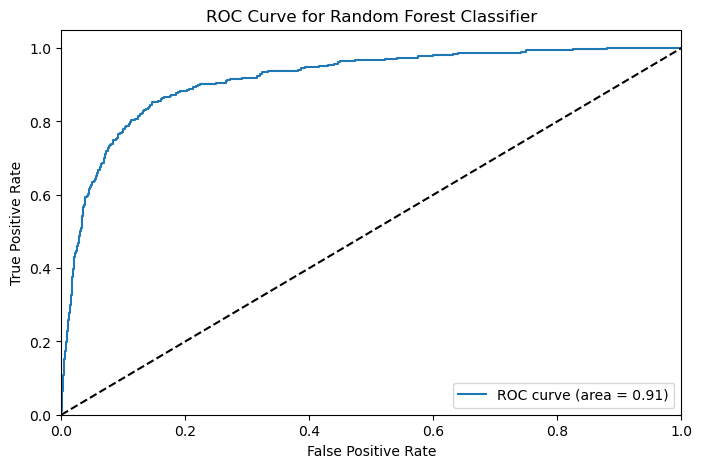

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities for the positive class
y_probs = model_AdaBoostClassifier.predict_proba(PCA_x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

#### The AUC score of 0.92 suggests that the Random Forest Classifier performs well in classifying the target variable, effectively distinguishing between positive and negative classes.

   Probability Cutoff  Accuracy Sensitivity Specificity
0                 0.1  0.036147         1.0         0.0
1                 0.2  0.036147         1.0         0.0
2                 0.3  0.045096         1.0    0.009284
3                 0.4  0.797245    0.889251    0.793794
4                 0.5  0.959496    0.397394    0.980577
5                 0.6  0.964324    0.019544    0.999756
6                 0.7  0.963853         0.0         1.0
7                 0.8  0.963853         0.0         1.0
8                 0.9  0.963853         0.0         1.0


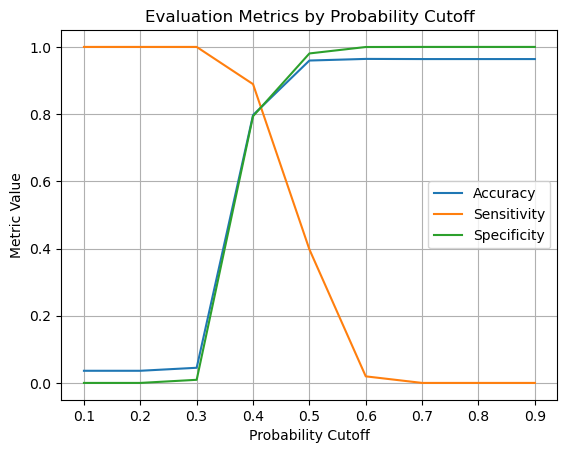

In [85]:
from sklearn import metrics 

## The table and graph depict the evaluation metrics (Accuracy, Sensitivity, Specificity) across various probability 
### cutoffs for the classifier's predictions.

cutoffs = np.arange(0.1, 1.0, 0.1)
evaluation_metrics = pd.DataFrame(index=cutoffs, columns=['Accuracy', 'Sensitivity', 'Specificity'])

# Calculate metrics for each cutoff
for cutoff in cutoffs:
    y_pred_cutoff = (y_probs > cutoff).astype(int)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_cutoff)
    total_predictions = np.sum(confusion_matrix)

    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total_predictions
    sensitivity = confusion_matrix[1, 1] / np.sum(confusion_matrix[1, :])
    specificity = confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])

    evaluation_metrics.loc[cutoff] = [accuracy, sensitivity, specificity]

evaluation_metrics.index.name = 'Probability Cutoff'
evaluation_metrics.reset_index(inplace=True)

# Display metrics and plot
print(evaluation_metrics)

evaluation_metrics.plot.line(x='Probability Cutoff', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Evaluation Metrics by Probability Cutoff')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
cutoff = 0.43
y_pred_final = (y_probs > cutoff).astype(int)
class_report = classification_report(y_test, y_pred_final)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8186
           1       0.23      0.77      0.35       307

    accuracy                           0.90      8493
   macro avg       0.61      0.84      0.65      8493
weighted avg       0.96      0.90      0.92      8493



## Top 6 Preditors

### The top 6 features are identified, providing insights into the key drivers of the target variable. These features can be prioritized in further analysis 

In [87]:
## Top 6 preditors based on Ada Boost Classifier
ada_importances = model_AdaBoostClassifier.feature_importances_

pca_components = IncrementalPCA.components_
original_feature_contributions = np.abs(pca_components.T @ ada_importances)
original_features = [f"Feature{i+1}" for i in range(113)] 
importance_df = pd.DataFrame({
    'Feature': original_features,
    'Importance': original_feature_contributions
}).sort_values(by='Importance', ascending=False)

In [88]:
original_feature_contributions = np.abs(IncrementalPCA.components_.T @ ada_importances)

# Map to original feature names
original_features = list(x_train.columns)  # Replace with your feature names
importance_df = pd.DataFrame({
    'Feature': original_features,
    'Importance': original_feature_contributions
}).sort_values(by='Importance', ascending=False)

# Reset index and display the top 6 features
top_6_features = importance_df.head(6).reset_index(drop=True)
print(top_6_features)

              Feature  Importance
0         sachet_3g_7    0.028975
1                 aon    0.028521
2  last_day_rch_amt_6    0.028450
3         vol_3g_mb_6    0.027996
4    std_ic_t2f_mou_7    0.027701
5         ic_others_6    0.025794


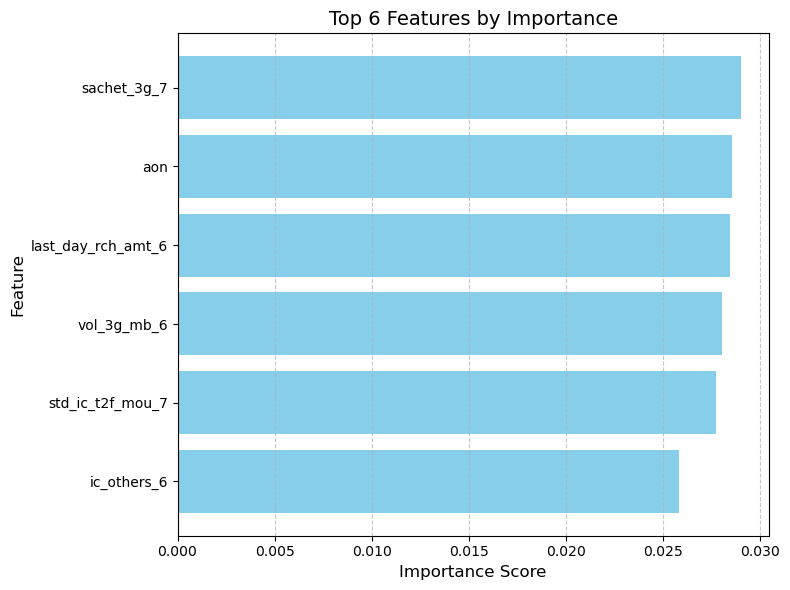

In [89]:
# top_6_features' contains the top features and their importance scores
plt.figure(figsize=(8, 6))

plt.barh(top_6_features['Feature'], top_6_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 6 Features by Importance', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

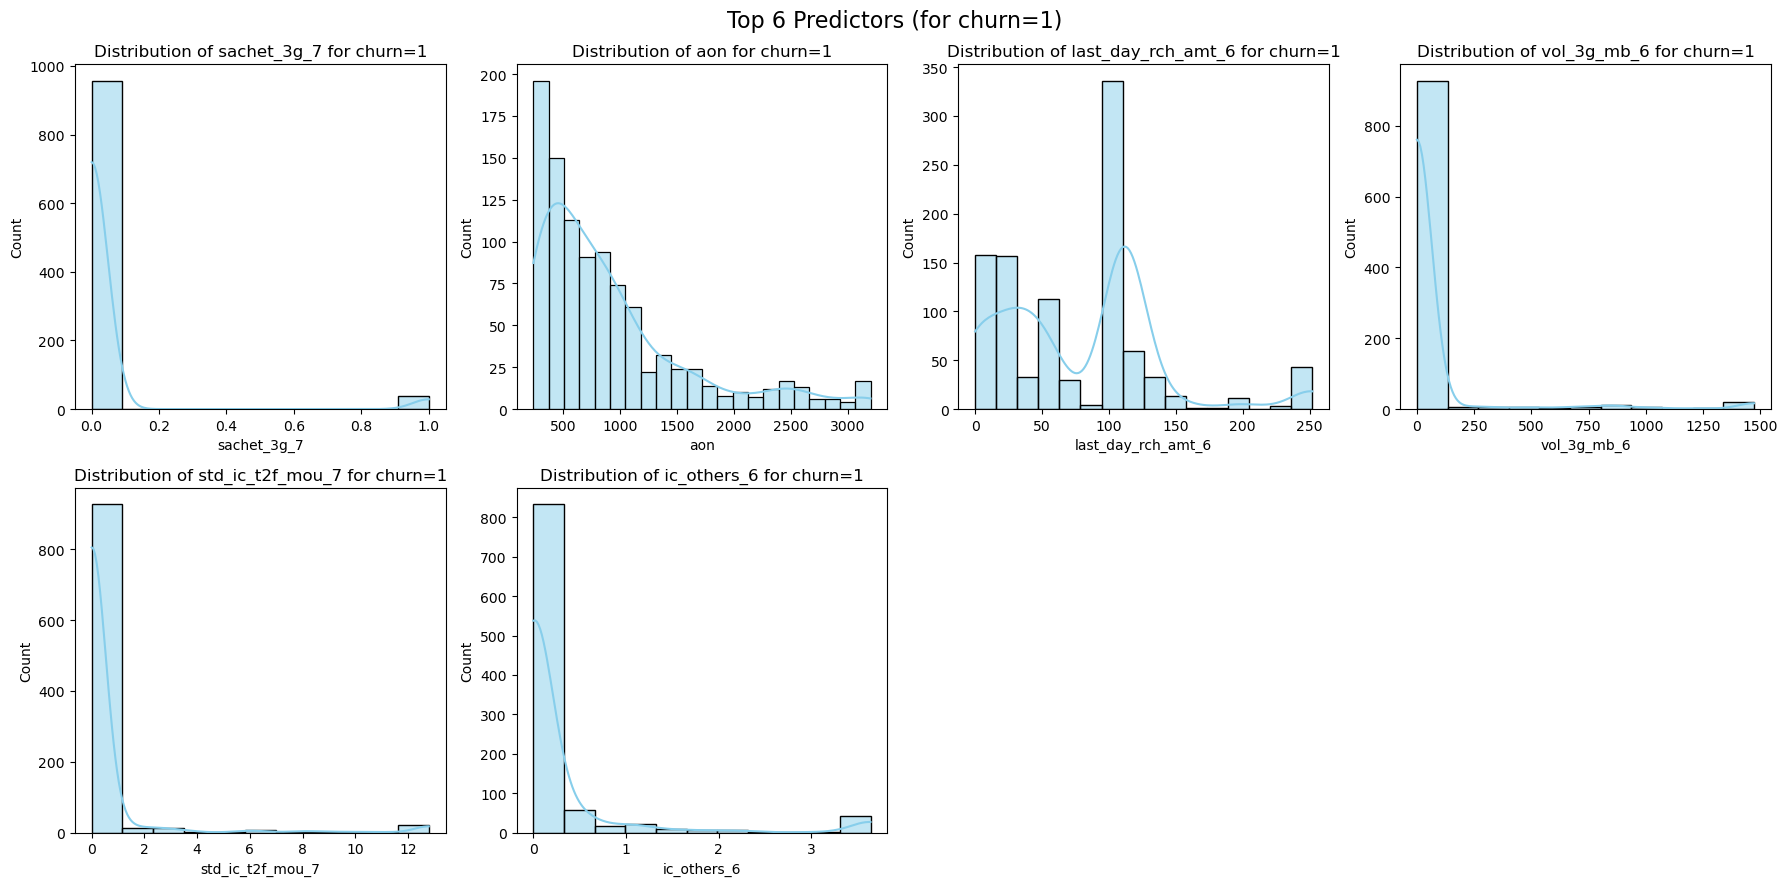

In [90]:
top_6_features_list = top_6_features['Feature'].tolist()[:6]
plt.figure(figsize=(18,9))
# Loop over the top 6 features and plot their distributions for churn=1
i = 1
for col in top_6_features_list:
    if col in Cleaning_df.columns:
        plt.subplot(2, 4, i)
        sns.histplot(Cleaning_df[Cleaning_df['churn'] == 1][col], color='skyblue', kde=True)
        plt.title(f'Distribution of {col} for churn=1')
        i = i + 1
    else:
        print(f"Column {col} not found in the DataFrame")
plt.suptitle('Top 6 Predictors (for churn=1)', fontsize=16)
plt.tight_layout()
plt.show()

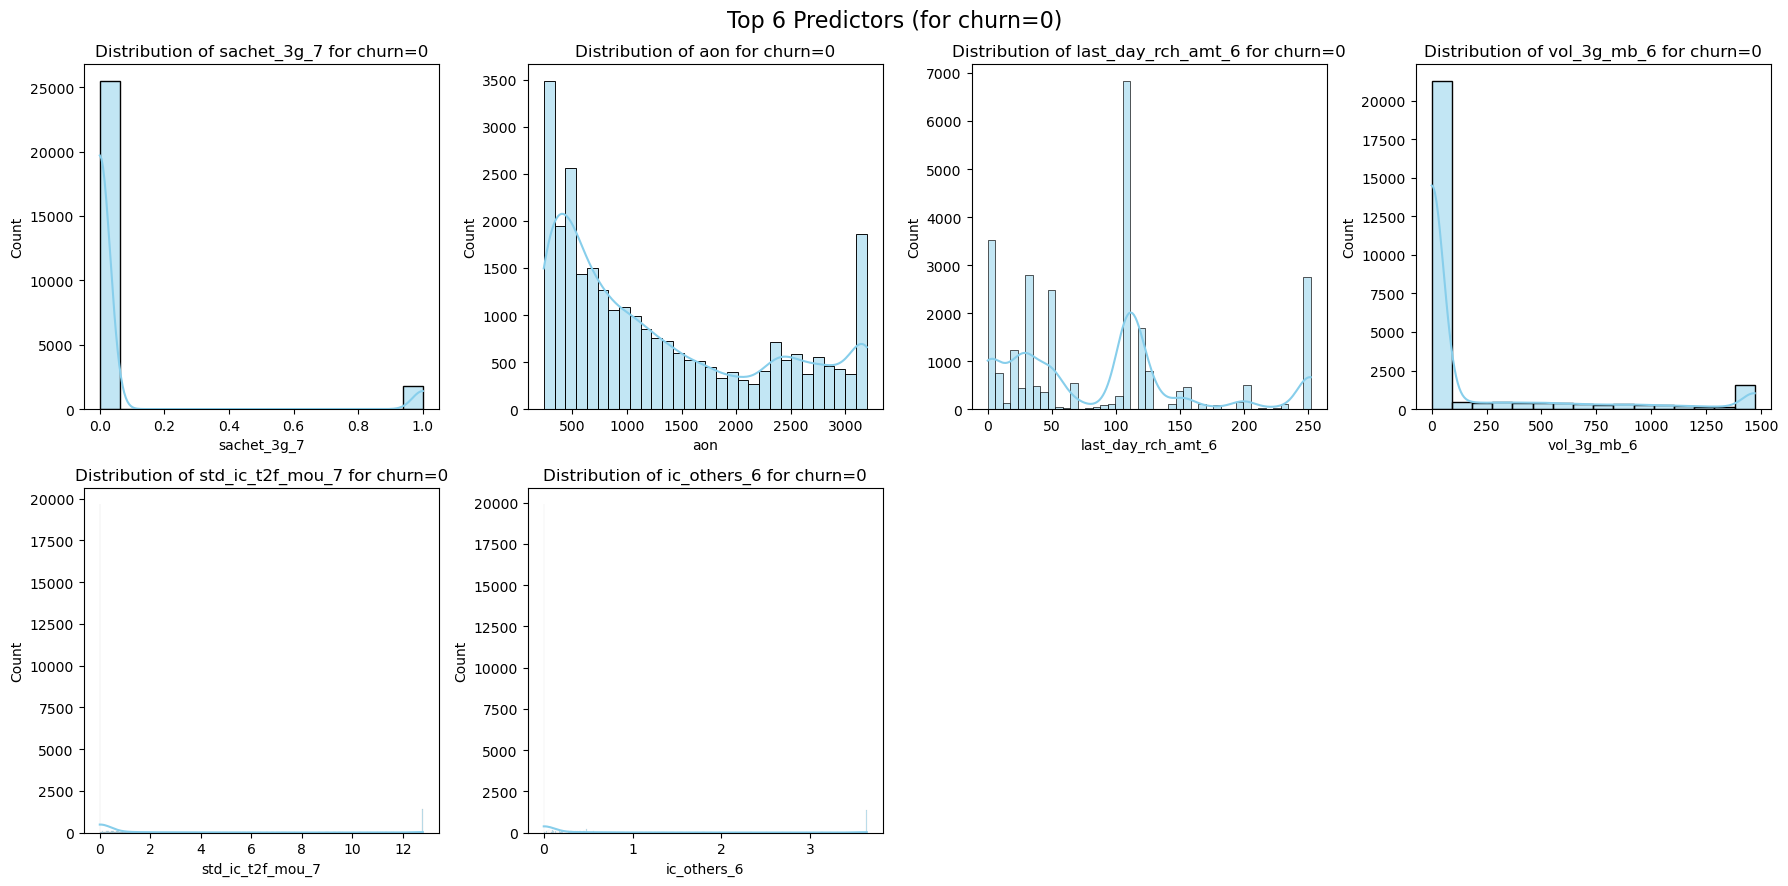

In [91]:
top_6_features_list = top_6_features['Feature'].tolist()[:6]
plt.figure(figsize=(18,9))
# Loop over the top 6 features and plot their distributions for churn=1
i = 1
for col in top_6_features_list:
    if col in Cleaning_df.columns:
        plt.subplot(2, 4, i)
        sns.histplot(Cleaning_df[Cleaning_df['churn'] == 0][col], color='skyblue', kde=True)
        plt.title(f'Distribution of {col} for churn=0')
        i = i + 1
    else:
        print(f"Column {col} not found in the DataFrame")
plt.suptitle('Top 6 Predictors (for churn=0)', fontsize=16)
plt.tight_layout()
plt.show()

### Recommendations

### Feature-Specific Recommendations:
> Sachet_3G_7:
>> Promote sachet 3G offers or affordable micro-data packs to attract churn-prone customers.
>> 
>Last_Day_Rech_Amt_6:
> 
>> Introduce recharge rewards for small and medium recharge amounts to encourage recharges among churn-prone users.
>> 
>Vol_3G_MB_6:
> 
>>Provide high-data plans with discounted rates or bonus data for increasing engagement with low data users.
>>
>AON:
> 
>>Create loyalty benefits like free upgrades, discounts, or exclusive plans for long-term customers.
>>
>STD_IC_T2F_Mou_7:
> 
>>Bundle fixed-line calling plans with mobile services to increase utility and satisfaction.
>>
>IC_Others_6:
> 
>>Offer competitive inter-network call rates or bonus benefits for calls involving other operators.

#### General Recommendations
> Personalized Retention Campaigns: Use these predictors to segment customers and target churn-prone groups with personalized offers.

> Proactive Engagement: Monitor customer behavior patterns (e.g., reduced recharge amounts or data usage) to intervene before churn occurs.

> Loyalty Programs: Reward consistent usage and tenure to ensure long-term customer retention.

>Usage Analytics: Continuously analyze usage trends to refine promotional strategies and customer segmentation.

> Feedback Mechanisms: Regularly gather feedback from customers with shorter tenure (low AON) or minimal usage to address dissatisfaction early.